[[1.         0.92932238]
 [0.92932238 1.        ]]


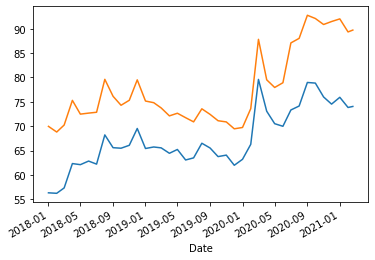

In [59]:
import yfinance as yf
import numpy as np
import matplotlib

start = '2018-01-01'
end = '2021-02-20'

usdbyn = yf.download('USDRUB=X', start, end, interval='1mo', progress=False)
eurbyn = yf.download('EURRUB=X', start, end, interval='1mo', progress=False)

#print(len(eurbyn))
usdbyn.Close.plot()
eurbyn.Close.plot()

print(np.corrcoef(usdbyn.Close.array, eurbyn.Close.array))

In [60]:
usdraw = usdbyn.Close.array
eurraw = eurbyn.Close.array

rub_balance = 0
usd_balance = 0
euro_balance = 0

usd_only_balance = 0
euro_only_balance = 0

spread = 5

for i in range(len(usdbyn)):
    rub_balance += 34000
    usd_balance += 33000.0 / (usdraw[i] + spread)
    euro_balance += 33000.0 / (eurraw[i] + spread)

    euro_only_balance += 100000.0 / (eurraw[i] + spread)
    usd_only_balance += 100000.0 / (eurraw[i] + spread)
final_balance = rub_balance + usd_balance * usdraw[-1] + euro_balance * eurraw[-1]
print('RUB: ', "{:,}".format(100000 * len(usdraw)))

print('RUB + hedge:', "{:,}".format(int(final_balance)))

print('USD only:  ', "{:,}".format(int(usd_only_balance * usdraw[-1])))
print('Euro only:  ', "{:,}".format(int(euro_only_balance * eurraw[-1])))

RUB:  3,900,000
RUB + hedge: 4,055,171
USD only:   3,513,797
Euro only:   4,257,602
